# Preparación del archivo e importación de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import scipy.stats as stats
import numpy as np

# 1. Apertura del archivo de Excel

file = "datos_prueba.xlsx" 
df = pd.read_excel(file, engine="openpyxl")

# 2. Se muestran las primeras filas para confirmar la carga correcta
display(df.head())  


# Caso de Estudio I : G1 con software, G2 sin software. 

Filtrado de datos 

In [ ]:
# 3. Obtención de Dataframe Caso 1
df_caso1 = df[df["Caso"] == 1]

# 4. Se muestran los primeros datos filtrados
display(df_caso1.head(n=10)) 

# 5. Se verifica que exista la columna "Caso"
if "Grupo" not in df_caso1.columns:
    raise KeyError(
        "No se encontró la columna 'Grupo'. Verifica el nombre exacto.")

# 6. Se seleccionan las columnas que se agregarán al análisis
variables = ["Tiempo (min)", "Número de Iteraciones", "Factor de Seguridad", "Relación de pandeo"]


Análisis Estadístico Descriptivo

In [ ]:
#7. Análisis descriptivo general (Datos tanto de G1 como de G2)
descripcion_general = df_caso1.describe()

#8. Análisis separado por grupo (G1 y G2)
descripcion_por_grupo = df_caso1.groupby("Grupo").describe()

#9. Análisis descriptivo general
descripcion_general = df_caso1[variables].describe()

#10. Análisis separado por grupo (G1 y G2) en diferentes tablas
descripcion_tiempo = df_caso1.groupby("Grupo")["Tiempo (min)"].describe()
descripcion_iteraciones = df_caso1.groupby("Grupo")["Número de Iteraciones"].describe()
descripcion_factor_est = df_caso1.groupby("Grupo")["Factor de Seguridad"].describe()
descripcion_factor_cierre = df_caso1.groupby("Grupo")["Factor de Seguridad Cierre"].describe()
descripcion_pandeo = df_caso1.groupby("Grupo")["Relación de pandeo"].describe()

#11. Visualización de Resultados de Análisis Estadístico Descriptivo

print("\t--- Análisis Estadístico Descriptivo: Caso de Estudio I ---")
display(descripcion_general)

print("\n--- Análisis de Tiempo por Grupo ---")
display(descripcion_tiempo)

print("\n--- Análisis de Número de Iteraciones por Grupo ---")
display(descripcion_iteraciones)

print("\n--- Análisis de F.D.S Fluencia Estático por Grupo ---")
display(descripcion_factor_est)

print("\n--- Análisis de F.D.S Fluencia Estático de Cierre por Grupo ---")
display(descripcion_factor_cierre)

print("\n--- Análisis de Relación de Pandeo por Grupo ---")
display(descripcion_pandeo)



	--- Análisis Estadístico Descriptivo: Caso de Estudio I ---


,Tiempo (min),Número de Iteraciones,Factor de Seguridad,Relación de pandeo
count,40.000000,40.000000,40.000000,40.000000
mean,10.060000,4.000000,1.164375,4.220175
std,5.380964,1.132277,0.128273,0.170331
min,2.500000,2.000000,1.000000,4.012000
25%,5.000000,3.000000,1.050000,4.100000
50%,9.750000,4.000000,1.200000,4.200000
75%,15.000000,5.000000,1.200000,4.300000
max,20.000000,6.000000,1.500000,4.600000



--- Análisis de Tiempo por Grupo ---


,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
G1,20.0,5.045,1.358976,2.5,4.425,5.0,6.0,7.5
G2,20.0,15.075,2.153791,12.0,13.750,15.0,16.0,20.0



--- Análisis de Número de Iteraciones por Grupo ---


,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
G1,20.0,4.65,0.933302,3.0,4.0,5.0,5.0,6.0
G2,20.0,3.35,0.933302,2.0,3.0,3.0,4.0,5.0



--- Análisis de F.D.S Fluencia Estático por Grupo ---


,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
G1,20.0,1.16375,0.139103,1.0,1.04875,1.20,1.2000,1.5
G2,20.0,1.16500,0.120099,1.0,1.08750,1.15,1.2125,1.4



--- Análisis de F.D.S Fluencia Estático de Cierre por Grupo ---


,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
G1,20.0,1.16375,0.139103,1.0,1.04875,1.20,1.2000,1.5
G2,20.0,1.16500,0.120099,1.0,1.08750,1.15,1.2125,1.4



--- Análisis de Relación de Pandeo por Grupo ---


,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
G1,20.0,4.28000,0.184305,4.020,4.1150,4.275,4.4250,4.6
G2,20.0,4.16035,0.134346,4.012,4.0575,4.110,4.2125,4.5


Inferencia Estadística: Comparación entre G1 y G2

In [ ]:
#12. Se filtran los grupos a comparar: G1 ---> software ; G2 ---> manual

grupo_1 = df_caso1[df_caso1["Grupo"] == "G1"]
grupo_2 = df_caso1[df_caso1["Grupo"] == "G2"]


# 13. Se realizan las pruebas para cada variable
for var in variables:
    print(f"\n🔹 Variable: {var}")
    
    # 14. Prueba de normalidad (Shapiro-Wilk)
    _, p_shapiro1 = shapiro(grupo_1[var])
    _, p_shapiro2 = shapiro(grupo_2[var])  
    print(f"  - Shapiro-Wilk (G1): p = {p_shapiro1:.4f}")
    print(f"  - Shapiro-Wilk (G2): p = {p_shapiro2:.4f}")

    # 15. Si alguna muestra no es normal, se usa Mann-Whitney U (prueba no paramétrica)
    if p_shapiro1 < 0.05 or p_shapiro2 < 0.05:
        print("  ⚠️ Al menos una de las muestras no es normal. Usando Mann-Whitney U Test.")
        _, p_u = mannwhitneyu(grupo_1[var], grupo_2[var], alternative='two-sided')
        print(f"  - Mann-Whitney U Test: p = {p_u:.4f}")
    else:
        #16. Prueba de homogeneidad de varianzas (Levene)
        _, p_levene = levene(grupo_1[var], grupo_2[var])
        print(f"  - Levene Test (Homogeneidad de Varianzas): p = {p_levene:.4f}")

        #17. Elegimos el tipo de prueba t según el resultado de Levene
        equal_var = p_levene >= 0.05  # Si p >= 0.05, asumimos varianzas iguales
        _, p_ttest = ttest_ind(grupo_1[var], grupo_2[var], equal_var=equal_var)
        print(f"  - t-Test: p = {p_ttest:.5f}")

    # Interpretación de resultados
    if (p_ttest if 'p_ttest' in locals() else p_u) < 0.05:
        print(f"  ✅ Hay una diferencia estadísticamente significativa para la variable {var} entre G1 y G2.")
    else:
        print(f"  ⚠️ No hay suficiente evidencia para afirmar que hay diferencia significativa en la variable {var} entre G1 y G2.")


🔹 Variable: Tiempo (min)
  - Shapiro-Wilk (G1): p = 0.3634
  - Shapiro-Wilk (G2): p = 0.3396
  - Levene Test (Homogeneidad de Varianzas): p = 0.0967
  - t-Test: p = 0.00000
  ✅ Hay una diferencia estadísticamente significativa para la variable Tiempo (min) entre G1 y G2.

🔹 Variable: Número de Iteraciones
  - Shapiro-Wilk (G1): p = 0.0233
  - Shapiro-Wilk (G2): p = 0.0068
  ⚠️ Al menos una de las muestras no es normal. Usando Mann-Whitney U Test.
  - Mann-Whitney U Test: p = 0.0003
  ✅ Hay una diferencia estadísticamente significativa para la variable Número de Iteraciones entre G1 y G2.

🔹 Variable: Factor de Seguridad
  - Shapiro-Wilk (G1): p = 0.0462
  - Shapiro-Wilk (G2): p = 0.0995
  ⚠️ Al menos una de las muestras no es normal. Usando Mann-Whitney U Test.
  - Mann-Whitney U Test: p = 0.8472
  ✅ Hay una diferencia estadísticamente significativa para la variable Factor de Seguridad entre G1 y G2.

🔹 Variable: Relación de pandeo
  - Shapiro-Wilk (G1): p = 0.1488
  - Shapiro-Wilk (G

Gráficos de Normalidad

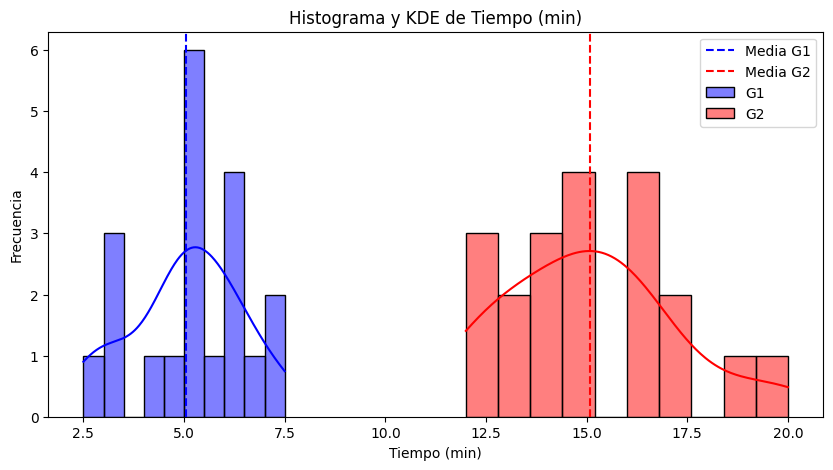

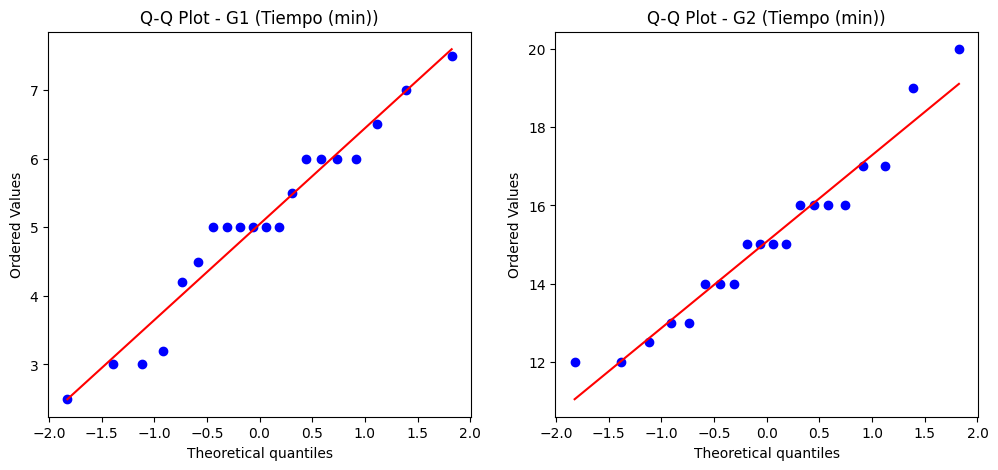

In [ ]:
# Definir la variable que quieres analizar
variable = "Tiempo (min)"

# Crear el gráfico

plt.figure(figsize=(10,5))
sns.histplot(grupo_1[variable], kde=True, color="blue", label="G1", bins=10)
sns.histplot(grupo_2[variable], kde=True, color="red", label="G2", bins=10)

plt.axvline(grupo_1[variable].mean(), color="blue", linestyle="dashed", label="Media G1")
plt.axvline(grupo_2[variable].mean(), color="red", linestyle="dashed", label="Media G2")

plt.legend()
plt.title(f"Histograma y KDE de {variable}")
plt.xlabel(variable)
plt.ylabel("Frecuencia")
plt.show()

# Gráficos Q-Q

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot para G1
stats.probplot(grupo_1[variable], dist="norm", plot=axes[0])
axes[0].set_title(f"Q-Q Plot - G1 ({variable})")

# Q-Q Plot para G2
stats.probplot(grupo_2[variable], dist="norm", plot=axes[1])
axes[1].set_title(f"Q-Q Plot - G2 ({variable})")
plt.show()


Diagramas de Cajas y Bigotes (Boxplots)

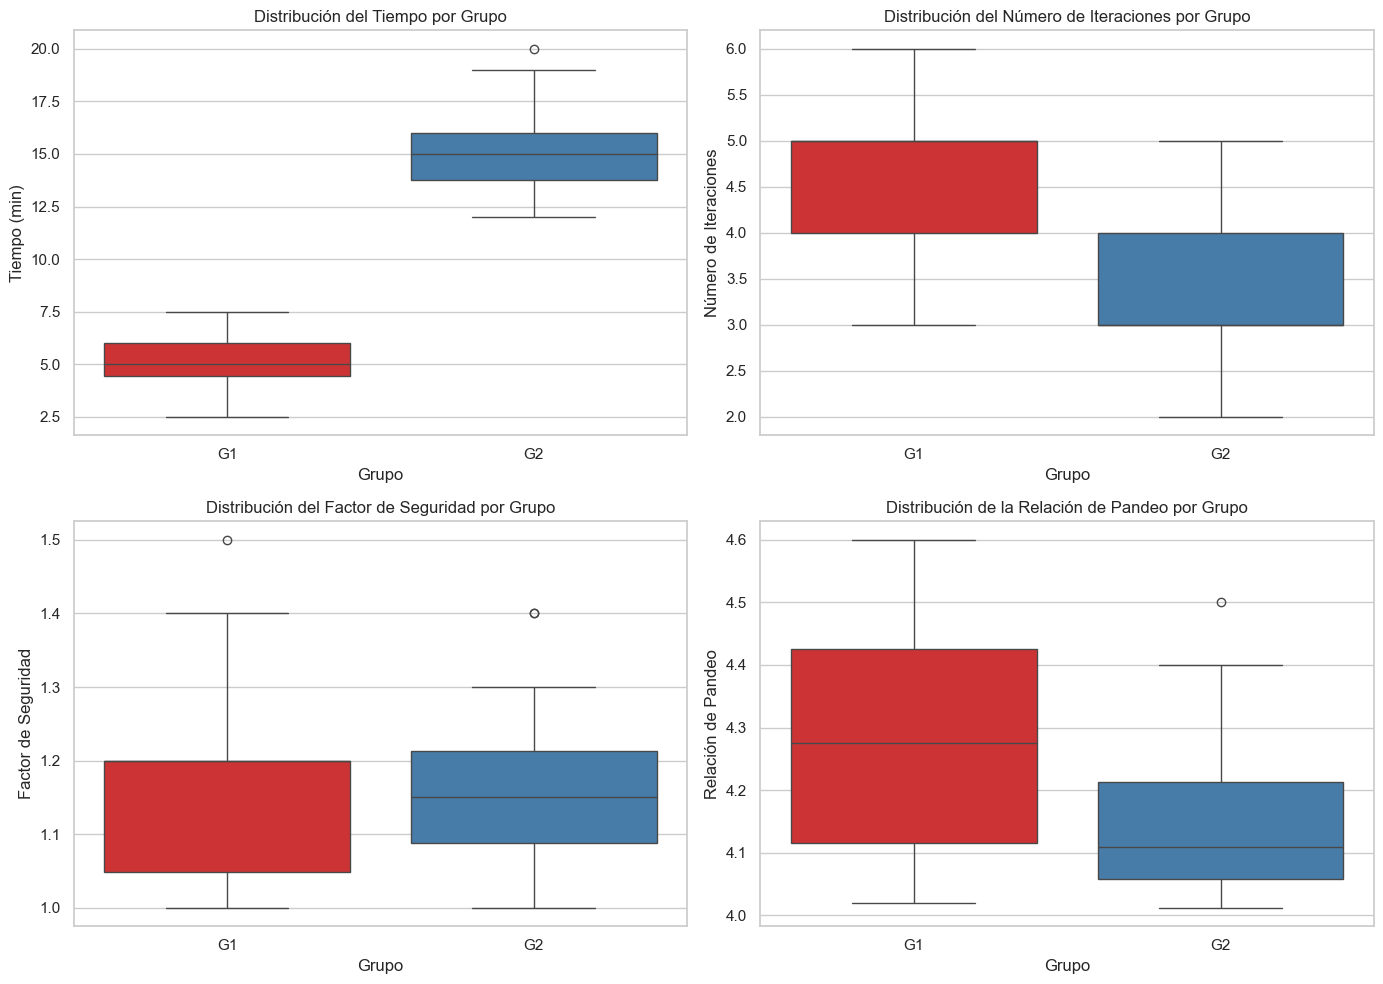

In [ ]:
# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Crear una figura con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot para Tiempo
sns.boxplot(x="Grupo", y="Tiempo (min)", hue="Grupo", data=df_caso1, ax=axes[0, 0], palette="Set1", legend=False)
axes[0, 0].set_title("Distribución del Tiempo por Grupo")
axes[0, 0].set_xlabel("Grupo")
axes[0, 0].set_ylabel("Tiempo (min)")

# Boxplot para Número de Iteraciones
sns.boxplot(x="Grupo", y="Número de Iteraciones", hue="Grupo", data=df_caso1, ax=axes[0, 1], palette="Set1", legend=False)
axes[0, 1].set_title("Distribución del Número de Iteraciones por Grupo")
axes[0, 1].set_xlabel("Grupo")
axes[0, 1].set_ylabel("Número de Iteraciones")

# Boxplot para Factor de Seguridad
sns.boxplot(x="Grupo", y="Factor de Seguridad", hue="Grupo", data=df_caso1, ax=axes[1, 0], palette="Set1", legend=False)
axes[1, 0].set_title("Distribución del Factor de Seguridad por Grupo")
axes[1, 0].set_xlabel("Grupo")
axes[1, 0].set_ylabel("Factor de Seguridad")

# Boxplot para Relación de Pandeo
sns.boxplot(x="Grupo", y="Relación de pandeo", hue="Grupo", data=df_caso1, ax=axes[1, 1], palette="Set1", legend=False)
axes[1, 1].set_title("Distribución de la Relación de Pandeo por Grupo")
axes[1, 1].set_xlabel("Grupo")
axes[1, 1].set_ylabel("Relación de Pandeo")

plt.tight_layout()
plt.show()

Diagramas de Barras

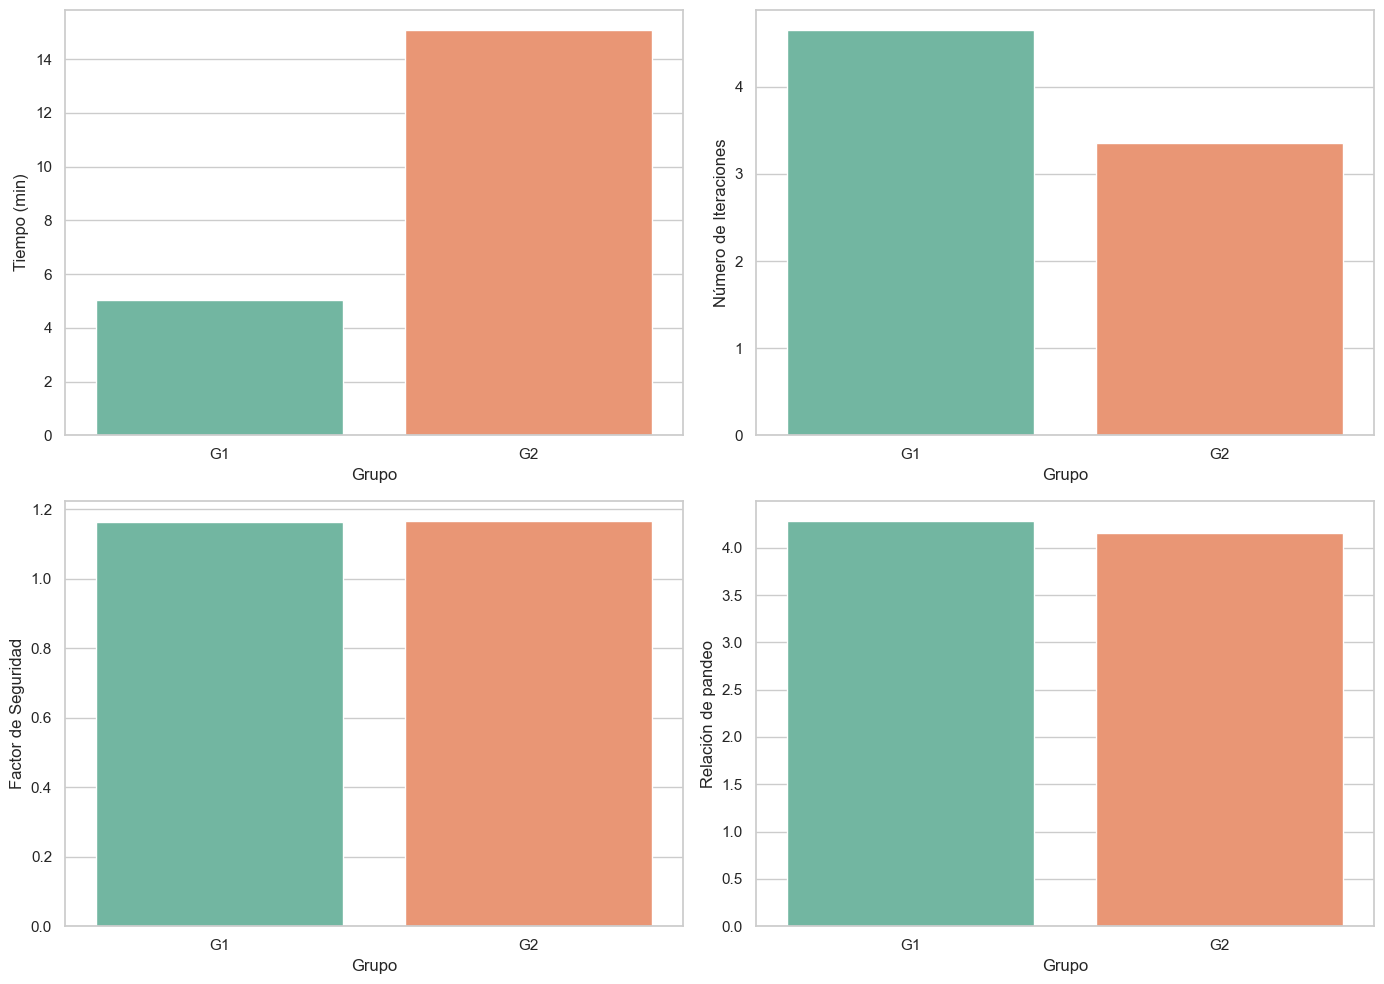

In [ ]:
# Configuración de la figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x="Grupo", y="Tiempo (min)", hue="Grupo", data=df_caso1, ax=axes[0, 0], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Número de Iteraciones", hue="Grupo", data=df_caso1, ax=axes[0, 1], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Factor de Seguridad", hue="Grupo", data=df_caso1, ax=axes[1, 0], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Relación de pandeo", hue="Grupo", data=df_caso1, ax=axes[1, 1], palette="Set2", legend=False, errorbar=None)

plt.tight_layout()
plt.show()


Scatter Plot (Gráfico de Dispersión)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Tiempo vs Iteraciones
"Número de Iteraciones"
sns.scatterplot(data=df_caso1, x="Número de Iteraciones", y="Tiempo (min)", hue="Grupo", style="Grupo", ax=axes[0, 0], palette="Set1")
axes[0, 0].set_title("Tiempo vs Iteraciones")

# Scatter plot: Tiempo vs Factor de Seguridad
sns.scatterplot(data=df_caso1, x="Tiempo (min)", y="Factor de Seguridad", hue="Grupo", style="Grupo", ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Tiempo vs Factor de Seguridad")

# Scatter plot: Iteraciones vs Relación de Pandeo
sns.scatterplot(data=df_caso1, x="Número de Iteraciones", y="Relación de pandeo", hue="Grupo", style="Grupo", ax=axes[1, 0], palette="Set3")
axes[1, 0].set_title("Iteraciones vs Relación de Pandeo")

# Scatter plot: Factor de Seguridad vs Relación de Pandeo
sns.scatterplot(data=df_caso1, x="Factor de Seguridad", y="Relación de pandeo", hue="Grupo", style="Grupo", ax=axes[1, 1], palette="Set3")
axes[1, 1].set_title("Factor de Seguridad vs Relación de Pandeo")

plt.tight_layout()
plt.show()


Pie Charts

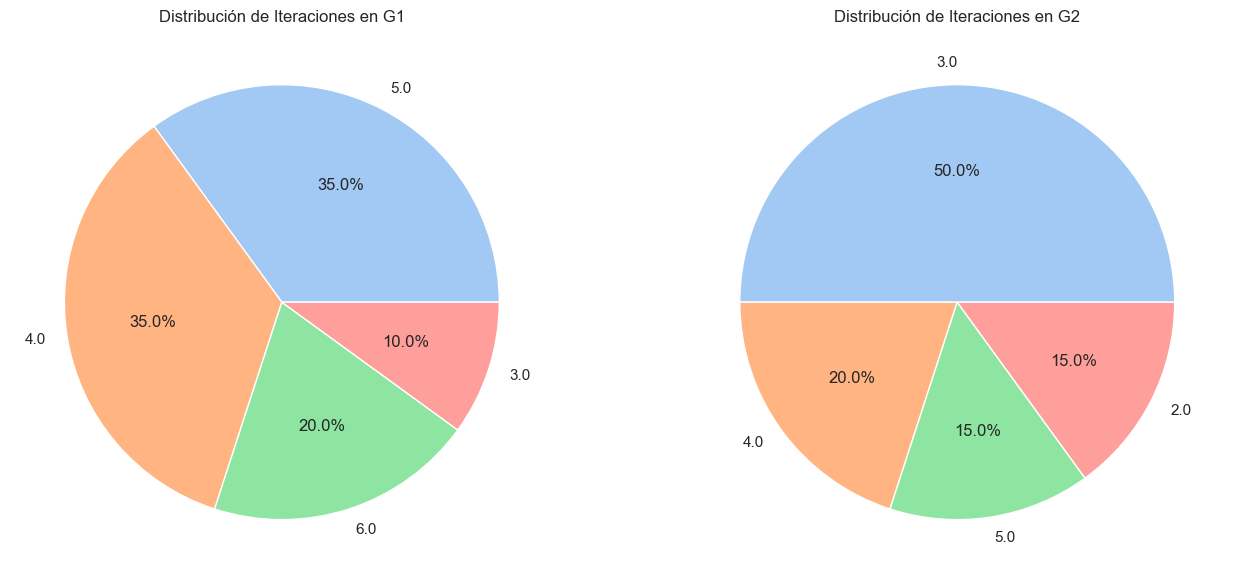

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir grupos a comparar
grupos = ["G1", "G2"]

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colores pastel para el gráfico
colores = sns.color_palette("pastel")

for i, grupo in enumerate(grupos):
    df_filtrado = df_caso1[df_caso1["Grupo"] == grupo]
    iteraciones_counts = df_filtrado["Número de Iteraciones"].value_counts()

    axes[i].pie(iteraciones_counts, labels=iteraciones_counts.index, autopct='%1.1f%%', colors=colores)
    axes[i].set_title(f"Distribución de Iteraciones en {grupo}")

# Ajustar diseño
plt.tight_layout()
plt.show()


# Caso de Estudio II : G1 sin software, G2 con software.

Filtrado de datos 

In [ ]:
# 3. Obtención de Dataframe Caso 2
df_caso2 = df[df["Caso"] == 2]

# 4. Se muestran los primeros datos filtrados
display(df_caso2.head(n=10)) 

# 5. Se verifica que exista la columna "Caso"
if "Grupo" not in df_caso2.columns:
    raise KeyError(
        "No se encontró la columna 'Grupo'. Verifica el nombre exacto.")

# 6. Se seleccionan las columnas que se agregarán al análisis
variables = ["Tiempo (min)", "Número de Iteraciones", "Factor de Seguridad", "Relación de pandeo"]

Análisis Estadístico Descriptivo

In [ ]:
#7. Análisis descriptivo general (Datos tanto de G1 como de G2)
descripcion_general = df_caso2.describe()

#8. Análisis separado por grupo (G1 y G2)
descripcion_por_grupo = df_caso2.groupby("Grupo").describe()

#9. Análisis descriptivo general
descripcion_general = df_caso2[variables].describe()

#10. Análisis separado por grupo (G1 y G2) en diferentes tablas
descripcion_tiempo = df_caso2.groupby("Grupo")["Tiempo (min)"].describe()
descripcion_iteraciones = df_caso2.groupby("Grupo")["Número de Iteraciones"].describe()
descripcion_factor_est = df_caso2.groupby("Grupo")["Factor de Seguridad"].describe()
descripcion_factor_cierre = df_caso2.groupby("Grupo")["Factor de Seguridad Cierre"].describe()
descripcion_pandeo = df_caso2.groupby("Grupo")["Relación de pandeo"].describe()

#11. Visualización de Resultados de Análisis Estadístico Descriptivo

print("\t--- Análisis Estadístico Descriptivo: Caso de Estudio I ---")
display(descripcion_general)

print("\n--- Análisis de Tiempo por Grupo ---")
display(descripcion_tiempo)

print("\n--- Análisis de Número de Iteraciones por Grupo ---")
display(descripcion_iteraciones)

print("\n--- Análisis de F.D.S Fluencia Estático por Grupo ---")
display(descripcion_factor_est)

print("\n--- Análisis de F.D.S Fluencia Estático de Cierre por Grupo ---")
display(descripcion_factor_cierre)

print("\n--- Análisis de Relación de Pandeo por Grupo ---")
display(descripcion_pandeo)


Inferencia Estadística: Comparación entre G1 y G2

In [ ]:
#12. Se filtran los grupos a comparar: G1 ---> software ; G2 ---> manual

grupo_1 = df_caso2[df_caso2["Grupo"] == "G1"]
grupo_2 = df_caso2[df_caso2["Grupo"] == "G2"]


# 13. Se realizan las pruebas para cada variable
for var in variables:
    print(f"\n🔹 Variable: {var}")
    
    # 14. Prueba de normalidad (Shapiro-Wilk)
    _, p_shapiro1 = shapiro(grupo_1[var])
    _, p_shapiro2 = shapiro(grupo_2[var])  
    print(f"  - Shapiro-Wilk (G1): p = {p_shapiro1:.4f}")
    print(f"  - Shapiro-Wilk (G2): p = {p_shapiro2:.4f}")

    # 15. Si alguna muestra no es normal, se usa Mann-Whitney U (prueba no paramétrica)
    if p_shapiro1 < 0.05 or p_shapiro2 < 0.05:
        print("  ⚠️ Al menos una de las muestras no es normal. Usando Mann-Whitney U Test.")
        _, p_u = mannwhitneyu(grupo_1[var], grupo_2[var], alternative='two-sided')
        print(f"  - Mann-Whitney U Test: p = {p_u:.4f}")
    else:
        #16. Prueba de homogeneidad de varianzas (Levene)
        _, p_levene = levene(grupo_1[var], grupo_2[var])
        print(f"  - Levene Test (Homogeneidad de Varianzas): p = {p_levene:.4f}")

        #17. Elegimos el tipo de prueba t según el resultado de Levene
        equal_var = p_levene >= 0.05  # Si p >= 0.05, asumimos varianzas iguales
        _, p_ttest = ttest_ind(grupo_1[var], grupo_2[var], equal_var=equal_var)
        print(f"  - t-Test: p = {p_ttest:.5f}")

    # Interpretación de resultados
    if (p_ttest if 'p_ttest' in locals() else p_u) < 0.05:
        print(f"  ✅ Hay una diferencia estadísticamente significativa para la variable {var} entre G1 y G2.")
    else:
        print(f"  ⚠️ No hay suficiente evidencia para afirmar que hay diferencia significativa en la variable {var} entre G1 y G2.")

Gráficos de Normalidad

In [ ]:
# Definir la variable que quieres analizar
variable = "Tiempo (min)"

# Crear el gráfico

plt.figure(figsize=(10,5))
sns.histplot(grupo_1[variable], kde=True, color="blue", label="G1", bins=10)
sns.histplot(grupo_2[variable], kde=True, color="red", label="G2", bins=10)

plt.axvline(grupo_1[variable].mean(), color="blue", linestyle="dashed", label="Media G1")
plt.axvline(grupo_2[variable].mean(), color="red", linestyle="dashed", label="Media G2")

plt.legend()
plt.title(f"Histograma y KDE de {variable}")
plt.xlabel(variable)
plt.ylabel("Frecuencia")
plt.show()

# Gráficos Q-Q

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot para G1
stats.probplot(grupo_1[variable], dist="norm", plot=axes[0])
axes[0].set_title(f"Q-Q Plot - G1 ({variable})")

# Q-Q Plot para G2
stats.probplot(grupo_2[variable], dist="norm", plot=axes[1])
axes[1].set_title(f"Q-Q Plot - G2 ({variable})")
plt.show()

Diagramas de Cajas y Bigotes (Boxplots)

In [ ]:
# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Crear una figura con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot para Tiempo
sns.boxplot(x="Grupo", y="Tiempo (min)", hue="Grupo", data=df_caso2, ax=axes[0, 0], palette="Set1", legend=False)
axes[0, 0].set_title("Distribución del Tiempo por Grupo")
axes[0, 0].set_xlabel("Grupo")
axes[0, 0].set_ylabel("Tiempo (min)")

# Boxplot para Número de Iteraciones
sns.boxplot(x="Grupo", y="Número de Iteraciones", hue="Grupo", data=df_caso2, ax=axes[0, 1], palette="Set1", legend=False)
axes[0, 1].set_title("Distribución del Número de Iteraciones por Grupo")
axes[0, 1].set_xlabel("Grupo")
axes[0, 1].set_ylabel("Número de Iteraciones")

# Boxplot para Factor de Seguridad
sns.boxplot(x="Grupo", y="Factor de Seguridad", hue="Grupo", data=df_caso2, ax=axes[1, 0], palette="Set1", legend=False)
axes[1, 0].set_title("Distribución del Factor de Seguridad por Grupo")
axes[1, 0].set_xlabel("Grupo")
axes[1, 0].set_ylabel("Factor de Seguridad")

# Boxplot para Relación de Pandeo
sns.boxplot(x="Grupo", y="Relación de pandeo", hue="Grupo", data=df_caso2, ax=axes[1, 1], palette="Set1", legend=False)
axes[1, 1].set_title("Distribución de la Relación de Pandeo por Grupo")
axes[1, 1].set_xlabel("Grupo")
axes[1, 1].set_ylabel("Relación de Pandeo")

plt.tight_layout()
plt.show()

Diagramas de Barras

In [ ]:
# Configuración de la figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x="Grupo", y="Tiempo (min)", hue="Grupo", data=df_caso2, ax=axes[0, 0], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Número de Iteraciones", hue="Grupo", data=df_caso2, ax=axes[0, 1], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Factor de Seguridad", hue="Grupo", data=df_caso2, ax=axes[1, 0], palette="Set2", legend=False, errorbar=None)
sns.barplot(x="Grupo", y="Relación de pandeo", hue="Grupo", data=df_caso2, ax=axes[1, 1], palette="Set2", legend=False, errorbar=None)

plt.tight_layout()
plt.show()

Scatter Plot (Gráfico de Dispersión)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Tiempo vs Iteraciones
"Número de Iteraciones"
sns.scatterplot(data=df_caso2, x="Número de Iteraciones", y="Tiempo (min)", hue="Grupo", style="Grupo", ax=axes[0, 0], palette="Set1")
axes[0, 0].set_title("Tiempo vs Iteraciones")

# Scatter plot: Tiempo vs Factor de Seguridad
sns.scatterplot(data=df_caso2, x="Tiempo (min)", y="Factor de Seguridad", hue="Grupo", style="Grupo", ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Tiempo vs Factor de Seguridad")

# Scatter plot: Iteraciones vs Relación de Pandeo
sns.scatterplot(data=df_caso2, x="Número de Iteraciones", y="Relación de pandeo", hue="Grupo", style="Grupo", ax=axes[1, 0], palette="Set3")
axes[1, 0].set_title("Iteraciones vs Relación de Pandeo")

# Scatter plot: Factor de Seguridad vs Relación de Pandeo
sns.scatterplot(data=df_caso2, x="Factor de Seguridad", y="Relación de pandeo", hue="Grupo", style="Grupo", ax=axes[1, 1], palette="Set3")
axes[1, 1].set_title("Factor de Seguridad vs Relación de Pandeo")

plt.tight_layout()
plt.show()


Pie Charts

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir grupos a comparar
grupos = ["G1", "G2"]

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colores pastel para el gráfico
colores = sns.color_palette("pastel")

for i, grupo in enumerate(grupos):
    df_filtrado = df_caso2[df_caso2["Grupo"] == grupo]
    iteraciones_counts = df_filtrado["Número de Iteraciones"].value_counts()

    axes[i].pie(iteraciones_counts, labels=iteraciones_counts.index, autopct='%1.1f%%', colors=colores)
    axes[i].set_title(f"Distribución de Iteraciones en {grupo}")

# Ajustar diseño
plt.tight_layout()
plt.show()